In [1]:
import numpy as np                      #the numpy library
from matplotlib import pyplot as plt    #the matplotlib.pyplot library
%matplotlib inline                  

### Input parameters

In [2]:
c_ini = 10.0                        # Initial concentration in mM
# diff = 4.9e-10                     # Diffusion coefficient in m^2/s spermidine
diff = 7.05e-10                     # diffusion coefficient of magnesium ++
xf = 2.0e-3                         # Gel-Stack thickness in m
xm = 1.0e-3                         # Reagent agarose slab thickness in m  

### PDE solver

In [3]:
0.5 * 0.00001**2 / (diff)

0.07092198581560284

In [4]:
dx = 1.0e-5                         # Spatial step size in m
nx = int((xf) / dx + 1)             # Number of points in space
dt = 0.01                           # less than 0.5 * dx**2 / (diff) in seconds
nt = 360001                         # Number of timesteps we want to calculate (1 hour)

c = np.zeros((nx, nt))              # a numpy array with nx * nt elements all equal to 0
c[0:int(xm / dx + 1), 0] = c_ini    # Initial condition c = c_ini between 0 and xm and c = 0 elsewhere

for t in range(1, nt):              #iterate through time
    for i in range(1, nx - 1):      #iterate through space
        c[i,t] = c[i,t-1]+((dt/(dx**2))*diff*(c[i+1,t-1]-2*c[i,t-1]+c[i-1,t-1])) # Discretized Fick's 2nd law
        c[0,t] = c[1,t]             # Homogeneous Neumann Boundary condition at x = 0
        c[nx-1,t] = c[nx-2,t]       # Homogeneous Neumann Boundary condition at x = xf

### Plots

#### Initial condition

Text(0, 0.5, '[reagent] (mM)')

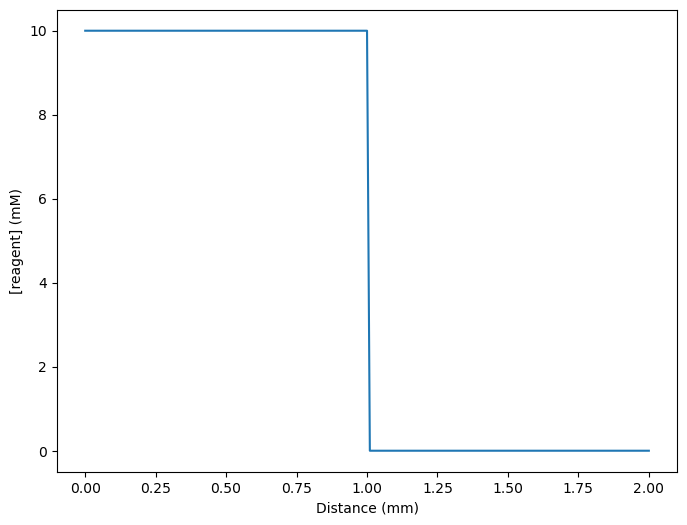

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6)) 
ax.plot(np.linspace(0, xf, nx)*1000, c[:,0])
ax.set_xlabel('Distance (mm)')
ax.set_ylabel('[reagent] (mM)')


#### Numerical results

- z axis-profiles of spermidine concentration spanning depicted agarose slabs as a function of time

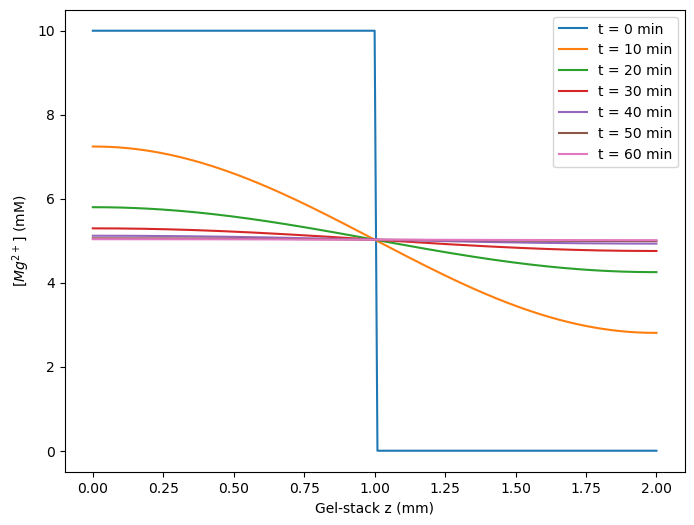

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.set_xlabel('Gel-stack z (mm)')
ax.set_ylabel('$[Mg^{2+}]$ (mM)')

for t in range(0, nt + 1, 60000):
    ax.plot(np.linspace(0, xf, nx)*1000, c[:,t], label='t = %d min' % int(t/6000))
    
ax.legend(loc='best')
#plt.savefig('one.svg')
plt.show()

- Evolution of reagent concentration just above the DNA analyte layer

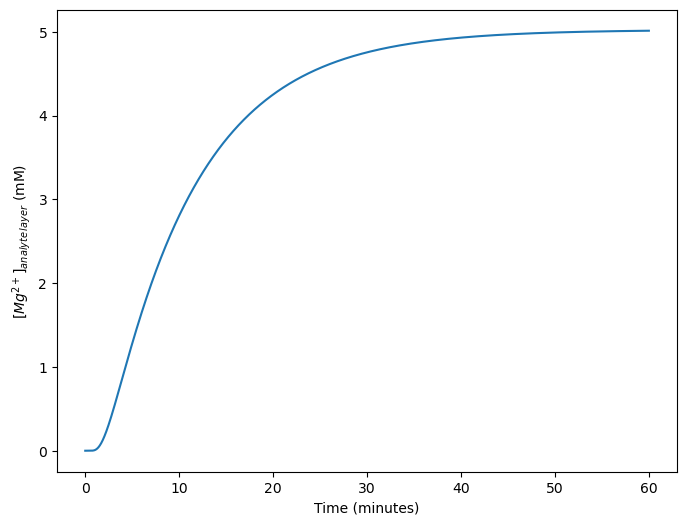

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.set_xlabel('Time (minutes)')
ax.set_ylabel(r'$[Mg^{2+}]_{analyte \, layer}$ (mM)')
ax.plot(np.linspace(0, 60, nt), c[-1,:])
#plt.savefig('two.svg')
plt.show()

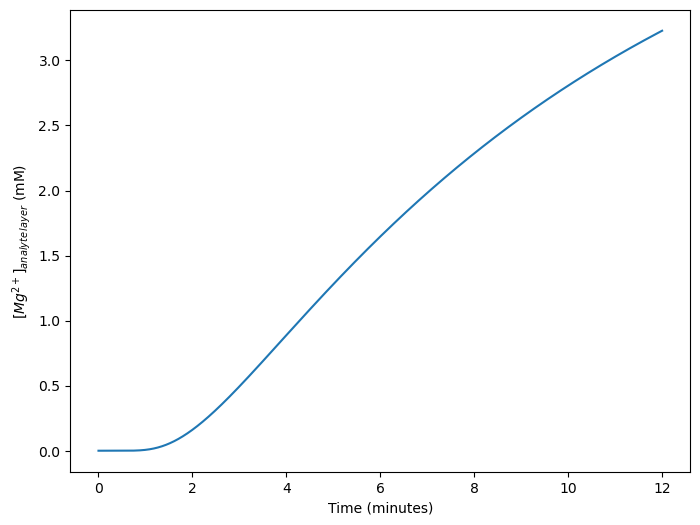

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.set_xlabel('Time (minutes)')
ax.set_ylabel(r'$[Mg^{2+}]_{analyte \, layer}$ (mM)')
ax.plot(np.linspace(0, 12, int(nt/5)), c[-1,:12*60*100])
#plt.savefig('twoinset.svg')
plt.show()